In [1]:
class Environment:
    actions = ['left', 'right', 'up', 'down']
    
    def __init__(self, rows, columns, start, goal, column_wind_speeds):
        # coordinate origin at top left
        self.rows = rows
        self.columns = columns
        self.start = start
        self.goal = goal
        self.column_wind_speeds = column_wind_speeds
        self.terminal_states = [goal] 
        self.reset()
        
    def reset(self):
        self.state = self.start
        
    def done(self):
        return self.state in self.terminal_states
    
    def take_action(self, action):
        """Take action and return (reward, new_state)"""
        row, column = self.state
        assert 0 <= row < self.rows and 0 <= column < self.columns
        assert action in self.actions
        
        new_row = row
        new_column = column
        
        if action == 'left':
            new_column -= 1
        elif action == 'right':
            new_column += 1
        elif action == 'up':
            new_row -= 1
        elif action == 'down':
            new_row += 1
        
        new_row -= self.column_wind_speeds[column]
        new_row = max(0, min(self.rows - 1, new_row))
        new_column = max(0, min(self.columns - 1, new_column))
        
        new_state = new_row, new_column
        self.state = new_state
        reward = -1
        return reward, new_state

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_trajectory(environment, trajectory):
    plt.figure()
    fig, axes = plt.subplots()
    axes.set_xlim([-0.5, environment.columns - 0.5])
    axes.xaxis.set_ticks(np.arange(-0.5, environment.columns - 0.5))
    axes.xaxis.set_ticklabels([])
    axes.set_ylim([environment.rows - 0.5, -0.5])
    axes.yaxis.set_ticks(np.arange(-0.5, environment.rows - 0.5))
    axes.yaxis.set_ticklabels([])
    axes.grid()
    axes.add_artist(plt.Circle(environment.start[::-1], 0.2, color='g'))
    axes.add_artist(plt.Circle(environment.goal[::-1], 0.2, color='r'))
    axes.plot([c[1] for c in trajectory], [c[0] for c in trajectory])

In [23]:
class DumbAgent:
    def get_action(self, action, previous_state, current_state, reward):
        return 'right'

def simulate_episode(environment, agent, max_steps=float('inf'), plot=False):
    environment.reset()
    trajectory = [environment.state]
    steps = 0
    
    reward = 0
    total_reward = 0
    action = None
    previous_state = None
    while not environment.done() and steps <= max_steps:
        action = agent.get_action(action, previous_state, environment.state, reward)
        previous_state = environment.state
        reward, _ = environment.take_action(action)
        total_reward += reward
        
        if plot:
            trajectory.append(environment.state)
            
        steps += 1
    
    if plot:
        plot_trajectory(environment, trajectory)
    
    return total_reward

-101

<Figure size 432x288 with 0 Axes>

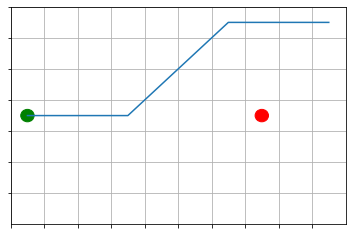

In [24]:
environment = Environment(7, 10, (3, 0), (3, 7), [0, 0, 0, 1, 1, 1, 2, 2, 1, 0])
agent = DumbAgent()
simulate_episode(environment, agent, max_steps=100, plot=True)

In [25]:
from collections import defaultdict
import random

class SARSA_Agent:
    def __init__(self, alpha, gamma, epsilon, environment):
        """Epsilon-greedy SARSA agent with learning rate alpha"""
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.environment = environment
        self.action_values = defaultdict(lambda: 0)
    
    def epsilon_greedy_action(self, state):
        actions = self.environment.actions
        
        if random.random() < self.epsilon:
            # explore
            return random.choice(actions)
        else:
            # exploit
            best_actions = []
            best_action_value = float('-inf')
            
            for action in actions:
                action_value = self.action_values[state, action]
                if action_value > best_action_value:
                    best_actions = [action]
                    best_action_value = action_value
                elif action_value == best_action_value:
                    best_actions.append(action)
            
            return random.choice(best_actions)
    
    def get_action(self, action, previous_state, current_state, reward):
        next_action = self.epsilon_greedy_action(current_state)
        
        if action != None:
            # update action values if this is not the first step in the episode
            self.action_values[previous_state, action] += self.alpha * (
                reward + self.gamma * self.action_values[current_state, next_action] -
                self.action_values[previous_state, action]
            )
        return next_action

In [30]:
environment = Environment(7, 10, (3, 0), (3, 7), [0, 0, 0, 1, 1, 1, 2, 2, 1, 0])
agent = SARSA_Agent(0.5, 1, 0.1, environment)

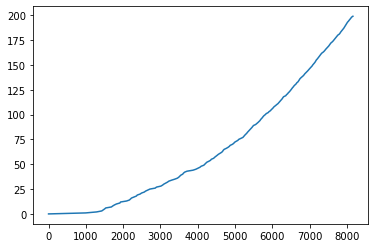

In [31]:
steps = 0
xs = []
ys = []

for episode in range(200):
    xs.append(steps)
    ys.append(episode)
    total_reward = simulate_episode(environment, agent)
    steps -= total_reward

plt.plot(xs, ys)

<Figure size 432x288 with 0 Axes>

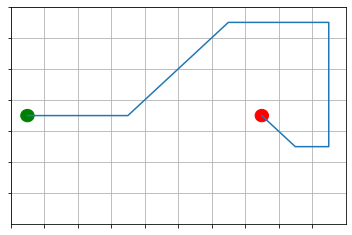

In [20]:
simulate_episode(environment, agent, plot=True)